<a href="https://colab.research.google.com/github/PythonIndian/Python/blob/main/DL_66_Prac_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exp-04a


In [1]:
import numpy as np

In [2]:
# Generate input values x
x = np.linspace(-3,3,61)   # 61 points from -3 to 3
# Calculate target values
y_true = np.sin(x)  # sine of each x

In [3]:
np.random.seed(42)  # For consistent results

In [4]:
input_size = 1
hidden_size = 10
output_size = 1

In [5]:
W1 = np.random.randn(input_size,hidden_size)  # Input to hidden layer weights
b1 = np.zeros((1,hidden_size))  # Hidden layer biases
W2 = np.random.randn(hidden_size,output_size)   # Hidden to output layer weights
b2 = np.zeros((1,output_size))  # Output layer biases

In [6]:
def relu(z):
    return np.maximum(0, z)

In [7]:
learning_rate = 0.01
epochs = 1000  # Number of times to loop through the entire dataset

In [8]:
for epochs in range(epochs):
  # Forward pass
  Z1 = np.dot(x.reshape(-1,1), W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2.flatten()

In [9]:
# Calculate the loss (Mean Squared Error)
loss = np.mean((y_pred - y_true) ** 2)

In [ ]:
# Backpropagation (simplified for understanding, focusing on the concept)
# Compute gradients (derivatives) of loss w.r.t weights and biases
# (Assuming specific simple derivatives for educational purposes)
# Update weights and biases using gradient descent


In [ ]:
# Placeholder for actual backpropagation code
# This part involves calculus and matrix operations to find gradients
# and update the parameters W1, b1, W2, b2

In [10]:
import matplotlib.pyplot as plt

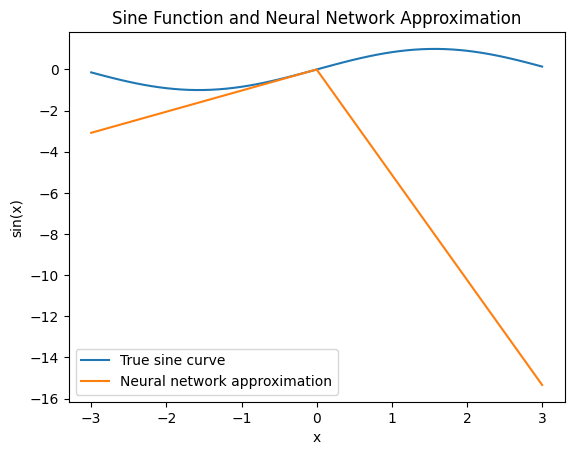

In [11]:
# Plotting the original sine curve and the neural network's approximation
plt.plot(x, y_true, label='True sine curve')
plt.plot(x,y_pred, label='Neural network approximation')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function and Neural Network Approximation')
plt.show()

Exp-4a Version-02


In [12]:
import numpy as np

In [14]:
# Generate 61 points for x in thhe range [-3, 3]
x = np.linspace(-3, 3, 61)
# Compute the target sin(x) for each x
y_true = np.sin(x)

In [17]:
# Define the size of each layer
input_size = 1 # Single input
hidden_size = 10 # Number of neurons in the hidden layer
output_size = 1 # Single output

In [18]:
# Initialize weights and biases
np.random.seed(42) # For reproducibility
W1 = np.random.randn(input_size,hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

In [23]:
def relu(z):
    return np.maximum(0, z)

In [24]:
def relu_deriv(z):
    return (z > 0).astype(float)

In [25]:
learning_rate = 0.01
epochs = 1000
losses = []

In [26]:
for epoch in range(epochs):
  # Forward pass
  Z1 = np.dot(x.reshape(-1, 1), W1) + b1
  A1 = relu(Z1)
  Z2 = np.dot(A1, W2) + b2
  y_pred = Z2

In [28]:
# Compute loss (Mean Squared Error)
loss = np.mean((y_pred.flatten() - y_true) ** 2)
losses.append(loss)

In [29]:
# Backpropogation
d_loss_y_pred = 2 * (y_pred.flatten() - y_true) / y_true.size
d_loss_y_pred = d_loss_y_pred.reshape(-1,1)

In [31]:
# Compute gradients
d_loss_Z2 = d_loss_y_pred
d_loss_A1 = np.dot(d_loss_Z2, W2.T)
d_loss_W2 = np.dot(A1.T, d_loss_Z2)
d_loss_b2 = np.sum(d_loss_Z2, axis=0, keepdims=True)
d_loss_Z1 = d_loss_A1 * relu_deriv(Z1)
d_loss_W1 = np.dot(x.reshape(-1, 1).T, d_loss_Z1)
d_loss_b1 = np.sum(d_loss_Z1, axis=0, keepdims=True)

In [32]:
# Update weights and biases
W1 -= learning_rate * d_loss_W1
b1 -= learning_rate * d_loss_b1
W2 -= learning_rate * d_loss_W2
b2 -= learning_rate * d_loss_b2

In [33]:
import matplotlib.pyplot as plt

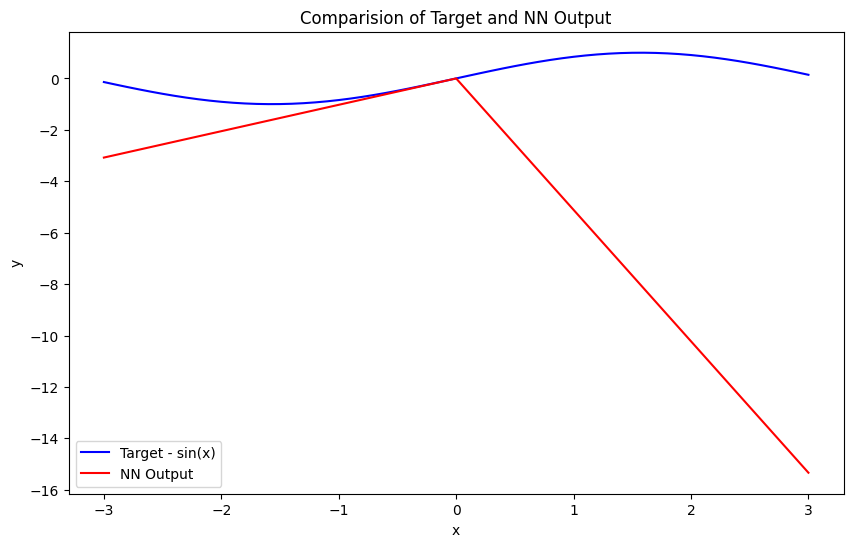

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x, y_true, label='Target - sin(x)', color='blue')
plt.plot(x, y_pred.flatten(), label='NN Output', color='red')
plt.title('Comparision of Target and NN Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Exp 4B

In [35]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [36]:
# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [37]:
# Step 2: Preprocess the data
# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
# Step 3: Define the model architecture
def create_model(hidden_layers=1, neurons=64, activation='relu', input_shape=(28, 28)):
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=input_shape)) # Flatten the input
for _ in range(hidden_layers):
model.add(layers.Dense(neurons, activation=activation)) # Add hidden layers
model.add(layers.Dense(10, activation='softmax')) # Output layer with softmax activation
return model

In [ ]:
# Example: Create a model with 2 hidden layers, 64 neurons each, using ReLU activation
model = create_model(hidden_layers=2, neurons=64, activation='relu', input_shape=(28, 28))

In [ ]:
# Step 4: Compile the model
model.compile(optimizer='sgd', # Stochastic Gradient Descent
loss='sparse_categorical_crossentropy', # Loss function for integers
metrics=['accuracy'])

In [ ]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

In [ ]:
# Step 6: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")